# Lab Activity 5.2. Apply Linear Regression Model on Diabetes

**Learning Outcomes**

1. Attempt to apply linear regression on an unsuitable dataset
2. Understand the difference between the model limitation and the inherited data limitations


In this activity, we will use the diabetes dataset from sklearn to train a linear regression model. The objective is to predict the diabetes progression level using the given features. However, the dataset is inherently more suitable for classification tasks, which will help you understand the limitations of using linear regression in this context.

## **Step1. Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Step2. Load and Explore the Dataset**

In [2]:
# Load the diabetes dataset
diabetes_data = load_diabetes()

# Create a DataFrame for better visualization
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the dataset information
print("\nDataset Info:")
print(df.info())

# Basic statistics of the dataset
print("\nStatistical Summary:")
print(df.describe())

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64


## **Step3. Visualize the Features**

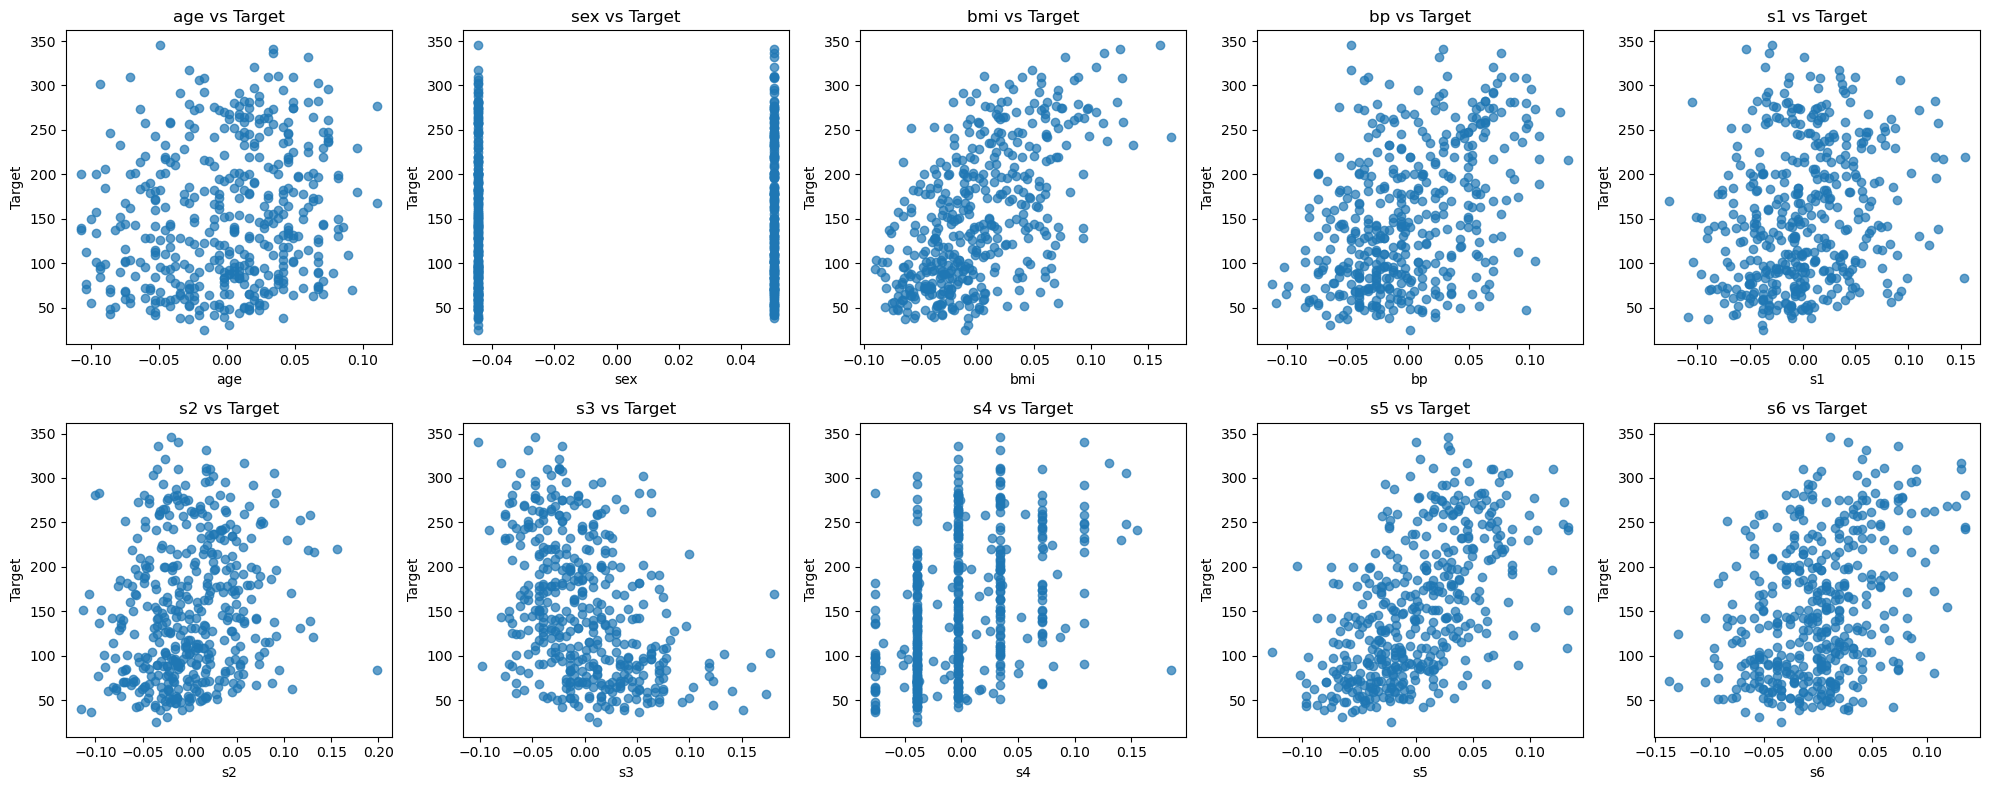

In [3]:
# Visualize the relationship between features and the target
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()
for i, feature in enumerate(diabetes_data.feature_names):
    axes[i].scatter(df[feature], df['target'], alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')
    axes[i].set_title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

## **Step4. Split the Data into Training and Testing Sets**

In [4]:
# Define features (X) and target (y)
X = diabetes_data.data
y = diabetes_data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 353 samples
Testing set size: 89 samples


## **Step 5. Train the Linear Regression Model**

In [5]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the coefficients and intercept
print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)


Model Coefficients:
[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]

Model Intercept:
151.34560453985995


## **Step 6. Evaluate the Model**


Mean Squared Error (MSE): 2900.19
R² Score: 0.45


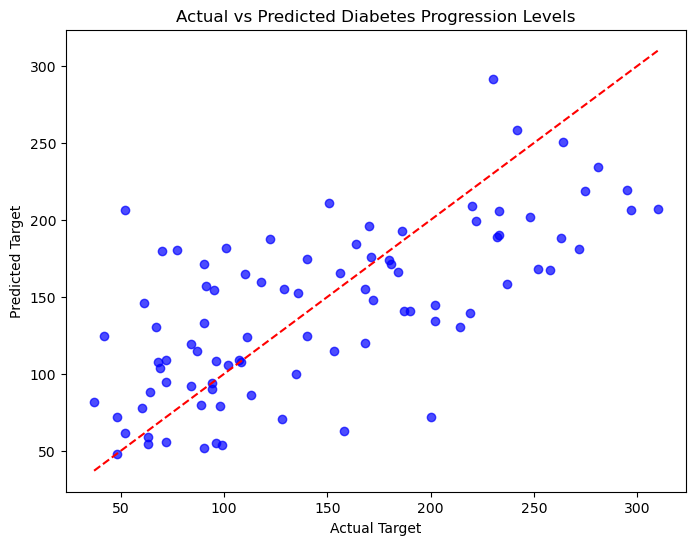

In [6]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted Diabetes Progression Levels')
plt.show()

## **Step 7. Reflect on Model and Data Limitations**

In [7]:
print("\nReflection:")
print("1. The low R² score indicates that linear regression is not a good fit for this dataset.")
print("2. The relationship between features and the target variable is likely non-linear, making linear regression unsuitable.")
print("3. This dataset may be better suited for a classification task, which will be explored in the next unit.")


Reflection:
1. The low R² score indicates that linear regression is not a good fit for this dataset.
2. The relationship between features and the target variable is likely non-linear, making linear regression unsuitable.
3. This dataset may be better suited for a classification task, which will be explored in the next unit.


## **Expected Outcome**
1. You will notice a poor fit between the model's predictions and the actual values, as indicated by a low \(R^2\) score.
2. The scatter plot of features vs the target will show irregular and non-linear patterns, reinforcing the unsuitability of linear regression for this dataset.
3. This activity will help you appreciate the challenges of applying linear regression to data that lacks a strong linear relationship.

### Further Exploration Tasks

To deepen your understanding of the limitations of linear regression and explore alternative approaches, here are two relevant tasks:

#### **Task 1: Explore Polynomial Regression**
In this task, you will apply **polynomial regression** to the diabetes dataset to capture potential non-linear relationships between features and the target variable.

1. **Steps**:
   - Use `PolynomialFeatures` from `sklearn.preprocessing` to transform the features into polynomial terms (e.g., quadratic or cubic).
   - Train a linear regression model on the transformed dataset.
   - Compare the results (R² and MSE) with the original linear regression model.
   - Visualize the predictions vs actual target values.

2. **Objective**:
   - Understand how polynomial regression can model non-linear relationships while still being a linear model in terms of coefficients.

3. **Guiding Questions**:
   - Does increasing the polynomial degree improve the model's performance?
   - How do you balance overfitting vs underfitting when using polynomial regression?

# Sample Solution for Task 1

Mean Squared Error (MSE): 3096.03
R² Score: 0.42


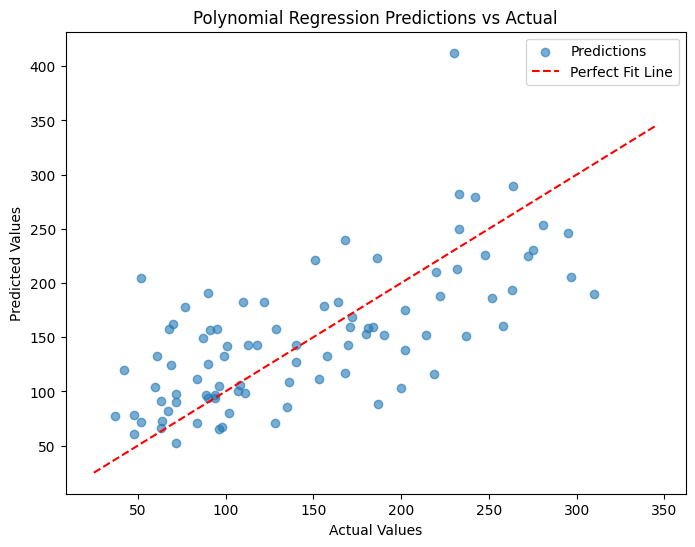

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features into polynomial terms
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree can be increased to test higher-order polynomials
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train linear regression on polynomial-transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Perfect Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression Predictions vs Actual")
plt.legend()
plt.show()

#### **Task 2: Investigate Feature Selection or Engineering**
In this task, you will explore whether certain features in the dataset have more predictive power and experiment with feature selection or engineering to improve the model.

1. **Steps**:
   - Use statistical metrics (e.g., correlation coefficients) to identify features most correlated with the target variable.
   - Train a linear regression model using only the selected features.
   - Alternatively, create new features (e.g., combinations of existing features, log transformations) to test their impact on model performance.

2. **Objective**:
   - Learn how feature selection or engineering can influence model performance.
   - Evaluate whether reducing dimensionality helps reduce noise and improve predictions.

3. **Guiding Questions**:
   - Are some features more impactful than others for predicting the target variable?
   - Does removing less relevant features improve or worsen the model's performance?

# Sample Solution for Task 2

Engineered Features' MSE: 2723.59
Engineered Features' R²: 0.49


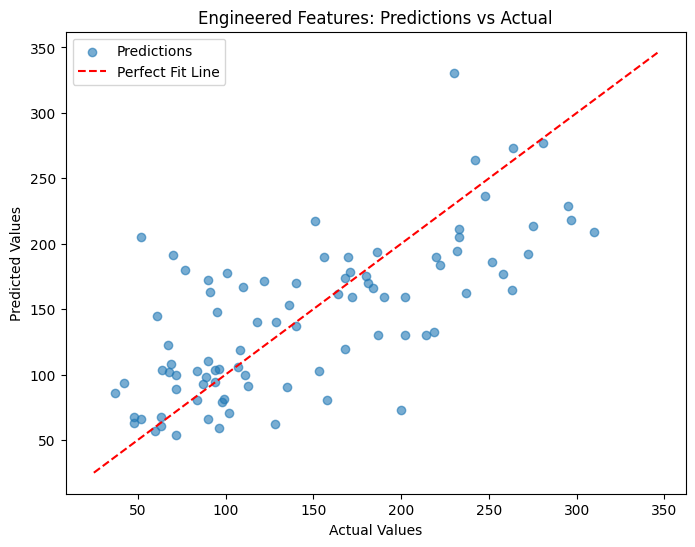

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering (Log and Square Root Transformations)
X_train_eng = np.hstack([X_train, np.log1p(np.abs(X_train)), np.sqrt(np.abs(X_train))])
X_test_eng = np.hstack([X_test, np.log1p(np.abs(X_test)), np.sqrt(np.abs(X_test))])

# Handle potential NaN values using an imputer
imputer = SimpleImputer(strategy='mean')
X_train_eng = imputer.fit_transform(X_train_eng)
X_test_eng = imputer.transform(X_test_eng)

# Train a linear regression model on engineered features
model_eng = LinearRegression()
model_eng.fit(X_train_eng, y_train)

# Predict on the test set
y_pred_eng = model_eng.predict(X_test_eng)

# Evaluate the model
mse_eng = mean_squared_error(y_test, y_pred_eng)
r2_eng = r2_score(y_test, y_pred_eng)

print(f"Engineered Features' MSE: {mse_eng:.2f}")
print(f"Engineered Features' R²: {r2_eng:.2f}")

# Compare predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_eng, alpha=0.6, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Perfect Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Engineered Features: Predictions vs Actual")
plt.legend()
plt.show()